# outline:
- for google api need to understand how requests work, as urlib3 is messy (see Sweigart)

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [88]:
ufo = pd.read_csv("scrubbed.csv")

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## cleaning latitude and longitude

In [89]:
row = -1
container = []
for i in ufo['latitude']:
    row += 1
    try:
        float(i)
    except ValueError:
        container.append((i, row))
container

[('33q.200088', 43782)]

In [90]:
ufo.columns.values

array(['datetime', 'city', 'state', 'country', 'shape',
       'duration (seconds)', 'duration (hours/min)', 'comments',
       'date posted', 'latitude', 'longitude '], dtype=object)

In [91]:
for c, v in enumerate(ufo.columns.values):
    print(c, '--->', v)

0 ---> datetime
1 ---> city
2 ---> state
3 ---> country
4 ---> shape
5 ---> duration (seconds)
6 ---> duration (hours/min)
7 ---> comments
8 ---> date posted
9 ---> latitude
10 ---> longitude 


In [92]:
ufo.iloc[43782 , 9] = '33.200088'

In [93]:
ufo['latitude'] = ufo['latitude'].astype(float)

# TNOTES: 
- proper way of columns renaming :

In [99]:
ufo.rename(columns={'longitude ':'longitude'}, inplace=True)

In [100]:
ufo.columns.values

array(['datetime', 'city', 'state', 'country', 'shape',
       'duration (seconds)', 'duration (hours/min)', 'comments',
       'date posted', 'latitude', 'longitude'], dtype=object)

In [103]:
ufo['longitude'] = ufo['longitude'].astype(float)

## adding unknown value to the 'country' feature : 

In [53]:
# some crazy thing : it doesn't work here 'inplace', but in the other notebook works 
ufo['country'] = ufo['country'].fillna('unknown')

In [54]:
ufo.isnull().sum()

datetime                   0
city                       0
state                   5797
country                    0
shape                   1932
duration (seconds)         0
duration (hours/min)       0
comments                  15
date posted                0
latitude                   0
longitude                  0
longitude                  0
dtype: int64

## trying reverse_geocoder :

In [56]:
import reverse_geocoder as rg

In [57]:
countries = ufo['country']

In [58]:
unknown_map = countries.where(countries == 'unknown')

In [60]:
for i in unknown_map:
    if i == 'unknown':
        print(i)
        break

unknown


In [107]:
for c, v in enumerate(ufo.columns.values):
    print(c, '--->', v)

0 ---> datetime
1 ---> city
2 ---> state
3 ---> country
4 ---> shape
5 ---> duration (seconds)
6 ---> duration (hours/min)
7 ---> comments
8 ---> date posted
9 ---> latitude
10 ---> longitude


In [108]:
from collections import OrderedDict

cont = OrderedDict()

row = 0
for i in unknown_map:
    
    if i == 'unknown':
        #print(i)
        lat = ufo.iloc[row, 9]
        long = ufo.iloc[row, 10]
        cont[row] = (lat, long)
    
    row += 1
    

In [109]:
cont

OrderedDict([(1, (29.38421, -98.581082)),
             (18, (32.364167, -64.678611)),
             (29, (53.970571, -111.689885)),
             (35, (-38.662334, 178.017649)),
             (40, (41.523427, -73.646795)),
             (47, (36.722263, -86.577218)),
             (55, (55.183333, 59.65)),
             (58, (26.149798, -97.913611)),
             (65, (-33.093373, 151.58898200000002)),
             (77, (40.935998, -73.901708)),
             (90, (27.150053, -82.480653)),
             (96, (43.40555, -88.705104)),
             (97, (38.627003, -90.199404)),
             (117, (41.79393, -86.743915)),
             (125, (53.070884, -2.7365060000000003)),
             (128, (40.058324, -74.405661)),
             (136, (55.288131, 23.957728)),
             (137, (42.209774, -79.466844)),
             (159, (35.20105, -91.83183299999999)),
             (174, (26.705621, -80.03643000000001)),
             (184, (59.900209, 5.282347)),
             (195, (40.516977, -80.2213479999

In [110]:
coords = []

for k, v in cont.items():
    coords.append(v)

In [114]:
geo_data = rg.search(coords)

In [113]:
geo_data

[OrderedDict([('lat', '29.38663'),
              ('lon', '-98.61797'),
              ('name', 'Lackland Air Force Base'),
              ('admin1', 'Texas'),
              ('admin2', 'Bexar County'),
              ('cc', 'US')]),
 OrderedDict([('lat', '32.38167'),
              ('lon', '-64.67806'),
              ('name', 'Saint George'),
              ('admin1', 'Saint George'),
              ('admin2', ''),
              ('cc', 'BM')]),
 OrderedDict([('lat', '53.71686'),
              ('lon', '-111.75181'),
              ('name', 'Two Hills'),
              ('admin1', 'Alberta'),
              ('admin2', ''),
              ('cc', 'CA')]),
 OrderedDict([('lat', '-38.65333'),
              ('lon', '178.00417'),
              ('name', 'Gisborne'),
              ('admin1', 'Gisborne'),
              ('admin2', 'Gisborne District'),
              ('cc', 'NZ')]),
 OrderedDict([('lat', '41.56204'),
              ('lon', '-73.60263'),
              ('name', 'Pawling'),
              ('admin1'

In [129]:
# taking keys , which are indices :
unknown_indices = []
for k in cont.keys():
    unknown_indices.append(k)

In [126]:
# deriving countries :
cc = []
for i in geo_data:
    new_country = i['cc'].lower()
    cc.append(new_country)
        
   

In [130]:
inc_cc = list(zip(unknown_indices, cc))

In [132]:
for i in inc_cc:
    ufo.iloc[i[0], 3] = i[1]

In [133]:
temp = ufo['country'].value_counts()
temp.sort_values(inplace=True, ascending=False)

In [136]:
temp

us    70907
ca     3618
gb     2387
au      633
mx      231
in      226
de      137
nl      115
br      109
nz      101
za       94
es       77
fr       68
ie       56
ph       56
jp       53
my       52
pt       42
no       42
gr       41
cn       40
be       40
se       36
it       34
pk       31
il       30
ro       30
ir       27
tr       27
pr       27
      ...  
fj        2
mm        2
dz        1
sx        1
kh        1
sz        1
st        1
ye        1
om        1
cv        1
kg        1
gl        1
sv        1
gh        1
mo        1
pg        1
lc        1
cw        1
ax        1
sb        1
cd        1
to        1
gd        1
sh        1
la        1
gu        1
bq        1
ge        1
tl        1
cm        1
Name: country, Length: 164, dtype: int64

In [134]:
x_label = temp.index.values
y_data = temp.tolist()

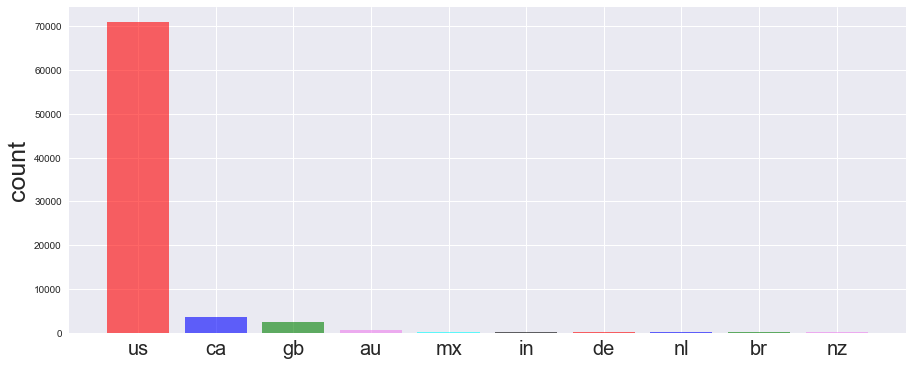

In [139]:
fig = plt.figure(figsize=(15, 6))
plt.bar(range(len(x_label[:10])),  y_data[:10], color=['red', 'blue', 'green', 'violet', 'cyan', 'black'], alpha=0.6)
plt.xticks(list(range(len(x_label[:10]))), x_label[:10], fontsize=20)
plt.ylabel('count', fontsize=25)

plt.show()

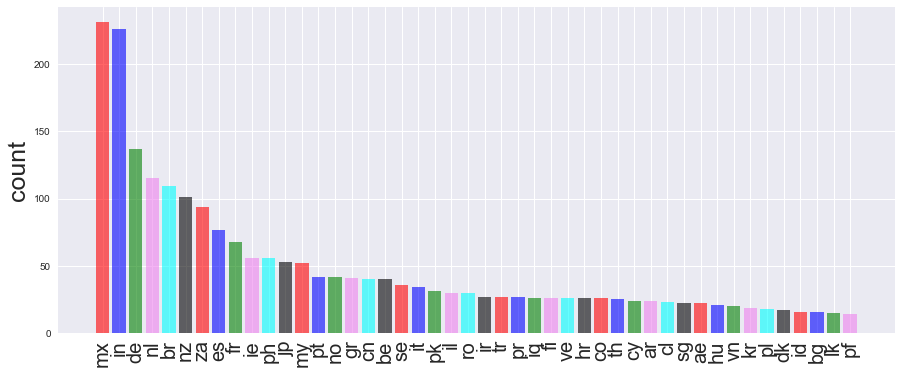

In [143]:
fig = plt.figure(figsize=(15, 6))
plt.bar(range(len(x_label[4:50])),  y_data[4:50], color=['red', 'blue', 'green', 'violet', 'cyan', 'black'], alpha=0.6)
plt.xticks(list(range(len(x_label[4:50]))), x_label[4:50], fontsize=20)
plt.ylabel('count', fontsize=25)
plt.xticks(rotation='vertical')

plt.show()

- and UFO's doesn't like my country :

In [144]:
temp['ru']

8

In [ ]:
# this how to retrieve country :
row = 0
for i in indices:
    
    if i == 'unknown':
        #print(i)
        lat = ufo.iloc[row, 7]
        long = ufo.iloc[row, 8]
        geo_data = rg.search((lat, long))
        
        # taking string, which is object on the map name
        #print(geo_data[0]['name'])
        
        # taking country
        #print(geo_data[0]['cc'].lower())
        #break
        
        new_country = geo_data[0]['cc'].lower()
        ufo.iloc[row, 3] = new_country
        
    row += 1
    

## trying google api :

In [69]:
#import beautifulsoup4
import requests

def getplace(lat, lon):
    url = "http://maps.googleapis.com/maps/api/geocode/json?"
    url += "latlng=%s,%s&sensor=false" % (lat, lon)
    
    response = requests.get(url)
    #soup = BeaurifulSoup(response.content, 'html.parser')
    return response
    

print(getplace(51.1, 0.1).text)
print(getplace(51.2, 0.1))
print(getplace(51.3, 0.1))

{
   "error_message" : "Keyless access to Google Maps Platform is deprecated. Please use an API key with all your API calls to avoid service interruption. For further details please refer to http://g.co/dev/maps-no-account",
   "results" : [],
   "status" : "OVER_QUERY_LIMIT"
}

<Response [200]>
<Response [200]>


In [145]:
import folium

In [148]:
coos = ufo[['latitude', 'longitude']]

In [149]:
m = folium.Map(location=[20, 0], tiles="Mapbox Bright", zoom_start=2)

In [152]:
for i in range(0,len(coos)):
    folium.Marker([coos.iloc[i]['latitude'], coos.iloc[i]['longitude']]).add_to(m)
m.save('312_markers_on_folium_map1.html')

KeyboardInterrupt: 

In [ ]:
# pattern to use multiple folumn markers :

# import libraries
import folium
import pandas as pd
 
# Make a data frame with dots to show on the map
data = pd.DataFrame({
'lat':[-58, 2, 145, 30.32, -4.03, -73.57, 36.82, -38.5],
'lon':[-34, 49, -38, 59.93, 5.33, 45.52, -1.29, -12.97],
'name':['Buenos Aires', 'Paris', 'melbourne', 'St Petersbourg', 'Abidjan', 'Montreal', 'Nairobi', 'Salvador']
})
data
 
# Make an empty map
m = folium.Map(location=[20, 0], tiles="Mapbox Bright", zoom_start=2)
 
# I can add marker one by one on the map
for i in range(0,len(data)):
folium.Marker([data.iloc[i]['lon'], data.iloc[i]['lat']], popup=data.iloc[i]['name']).add_to(m)
 
# Save it as html
m.save('312_markers_on_folium_map1.html')
